# Exploratory Data Analysis


Exploratory Data Analysis on dataset 'SampleSuperstore' to find out the patterns in data and to analyse the business trends in order to determine the weak areas that needs to be worked on in order to make more profit

# Importing Libraries

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the data

In [2]:
data=pd.read_csv("/kaggle/input/superstore/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.duplicated().sum()

17

#### So, there are 17 duplicate entries and let us drop them.

In [6]:
data.drop_duplicates(inplace= True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Dropping unwanted columns 

In [8]:
data.drop(["Postal Code"], axis=1,inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


# Correlation between the data

In [10]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

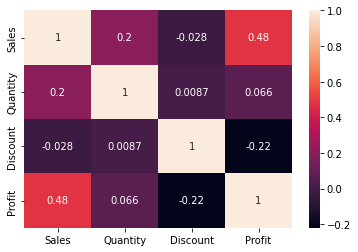

In [11]:
sns.heatmap(data.corr(), annot=True)

# EDA

### Analysing the different kinds of Shipping Modes, Segments and categories mentioned in the data

## Shipping Mode

In [12]:
data["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

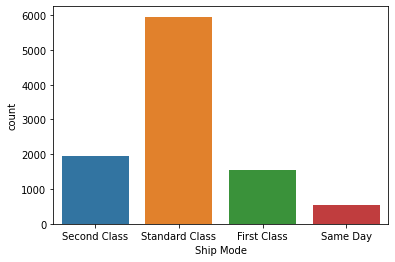

In [13]:
sns.countplot(x= data['Ship Mode'])

## Different Segments

In [14]:
data["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

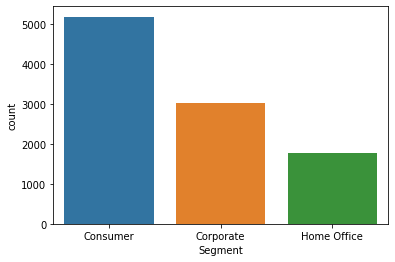

In [15]:
sns.countplot(x= data['Segment'])

## Categories of the items

In [16]:
data["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

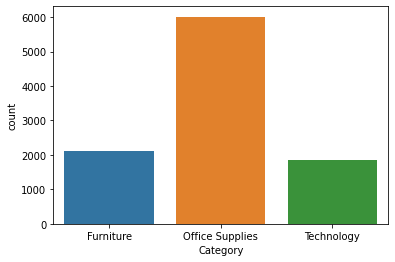

In [17]:
sns.countplot(x= data['Category'])

#### From the above plot we can conclude that Office Supplies Category has highest number of sales. Now let us see the sub-categories as well.


## Sub-categories of items

In [18]:
data["Sub-Category"].value_counts()


Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

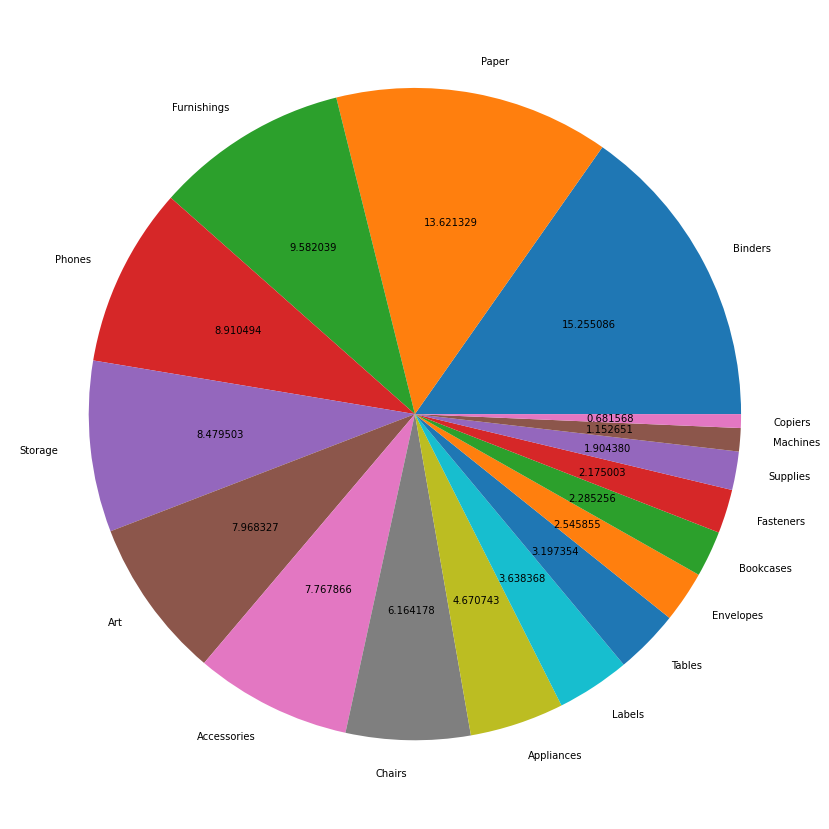

In [19]:

plt.figure(figsize=(15,15))
plt.pie(data["Sub-Category"].value_counts(), labels= data["Sub-Category"].value_counts().index, autopct ="%2f")
plt.show()

#### Here, Sub-Category with highest sale is Binder, follwed by Paper and Furnishings as second and third respectively.

In [20]:
st_profit=data.groupby(["State"])["Profit"].sum().nlargest(20)

In [21]:
st_profit

State
California       76330.7891
New York         74015.4622
Washington       33368.2375
Michigan         24428.0903
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State'>

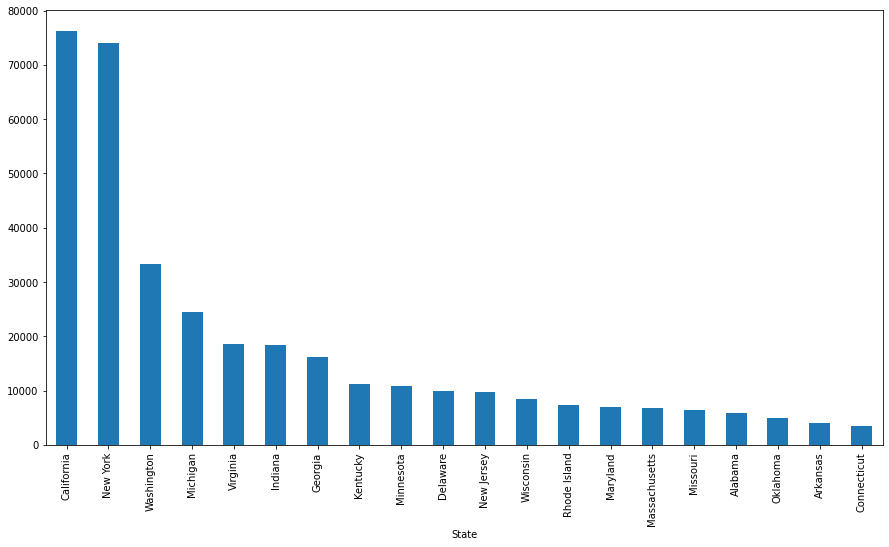

In [22]:
plt.figure(figsize=(15,8))
st_profit.plot.bar()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

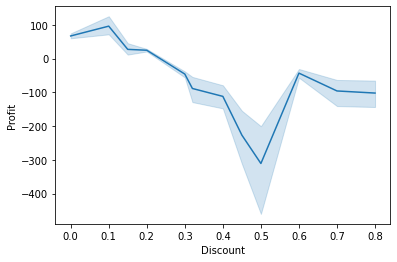

In [23]:
sns.lineplot(data=data, x="Discount", y= "Profit")

#### So we can see that when discount increases profit decreases

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

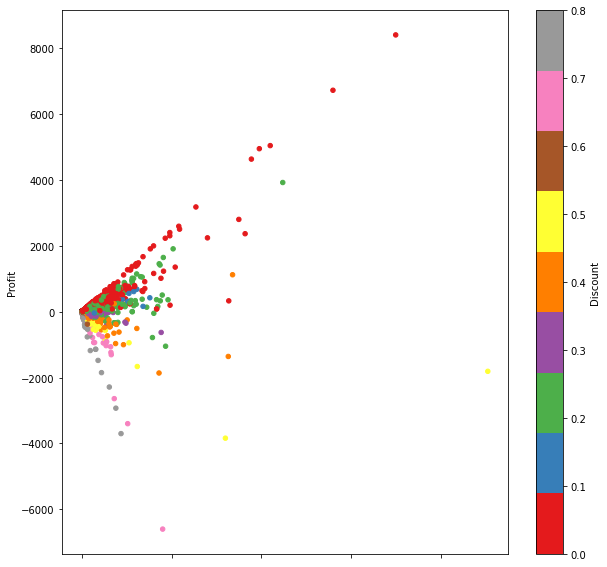

In [24]:
data.plot(kind="scatter",x="Sales",y="Profit", c="Discount", colormap="Set1",figsize=(10,10))

In this scatter plot we can clearly see that more sales does not mean more profit. It depends on discount as well. 
When Sales is high and there is low discount, the profit margin is higher.

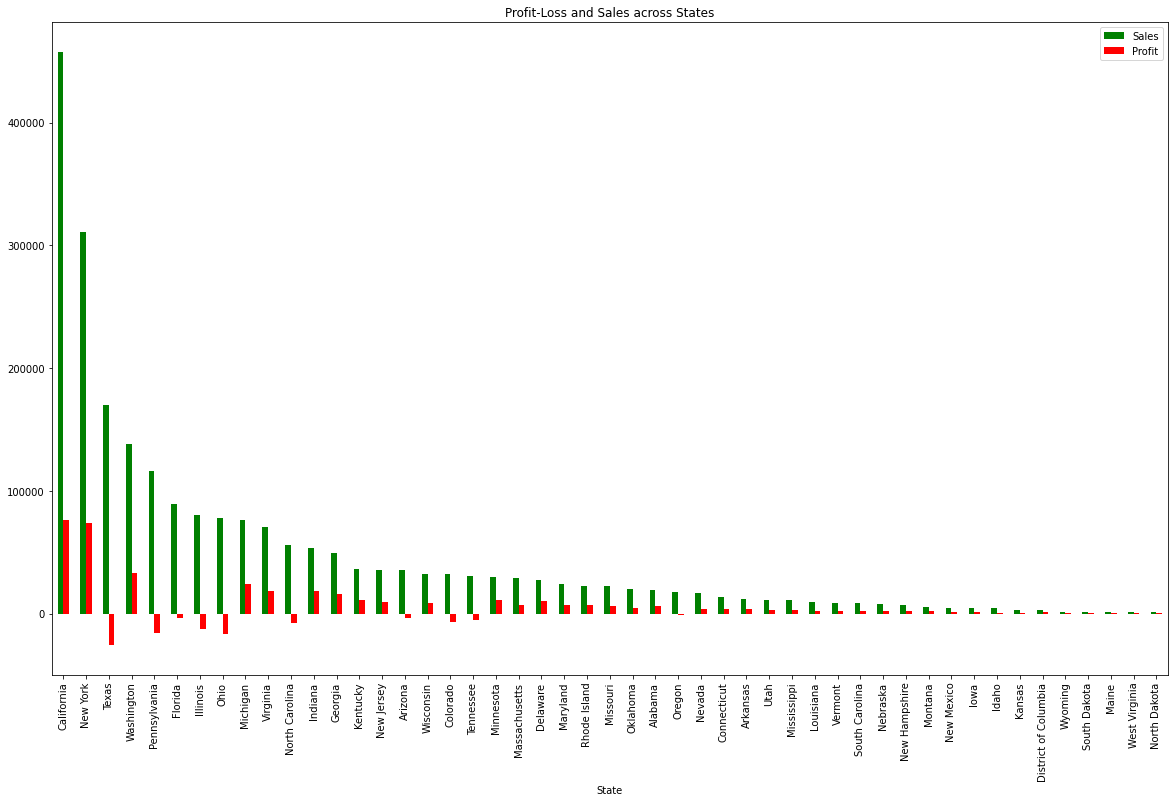

In [25]:
data1= data.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Green","Red"], figsize=(20,12))
plt.title("Profit-Loss and Sales across States")
plt.show()

California and New York generate more profit compared to the other states.

# Profit-Loss and Sales across Region

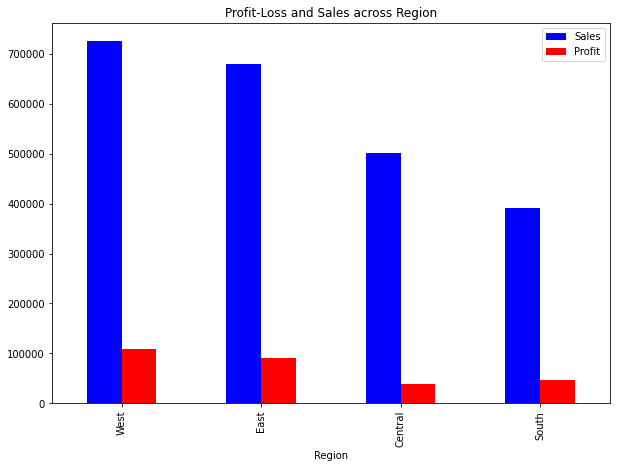

In [26]:

data1= data.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Blue","Red"], figsize=(10,7))
plt.title("Profit-Loss and Sales across Region")
plt.show()





# Conclusion:


1. The western region generates highest profit.
2. California, NewYork and Washington generates the most sales compared to the other places. 
3. The central region generates lowest profit. 
4. Texas, Pennsylvenia, Florida, Illinois, Ohio and some other states are generating loss with high sale. So we need to give some attention towards them.

Therefore, we have to work more on California and New York. Increase the sales in these states by reducing sales in states like Texas, Florida, Ohio. By decreasing the discount rates in Central region we can increase the profit. Finally we should increase the sale of Office Supplies category as they contribute more.



